In [1]:
import numpy as np 
import pandas as pd 
import matplotlib.pyplot as plt

import tensorflow as tf
from tensorflow.keras import models, layers

import warnings 
warnings.filterwarnings("ignore")
import os
os.environ['TF_CPP_MIN_LOG_LEVEL'] = '2'


In [2]:
folder=r"C:\Users\hp\OneDrive\Desktop\Mini Project\cell_images\cell_images"

In [3]:
tf.keras.utils.image_dataset_from_directory??

In [4]:
data=tf.keras.utils.image_dataset_from_directory(folder,image_size=(40,40),class_names=["Parasitized","Uninfected"],batch_size=200)

Found 27558 files belonging to 2 classes.


In [5]:
type(data)

tensorflow.python.data.ops.dataset_ops.BatchDataset

In [6]:
data_iterator=data.as_numpy_iterator()

In [7]:
batch=data_iterator.next()[0].max()

In [8]:
batch

243.84644

In [9]:
data=data.map(lambda x,y:(x/255,y))

Instructions for updating:
Lambda fuctions will be no more assumed to be used in the statement where they are used, or at least in the same block. https://github.com/tensorflow/tensorflow/issues/56089


In [10]:
data.as_numpy_iterator().next()[0].max()

0.96447325

# splitting of our data 

In [11]:
len(data)

138

In [12]:
138*200

27600

In [13]:
train_size=100
val_size=20
test_size=18


In [14]:
train_size,val_size,test_size

(100, 20, 18)

In [15]:
train=data.take(train_size)
test=data.skip(train_size).take(test_size)
val=data.skip(test_size+train_size).take(val_size)


# cnn model with 1 layer

In [19]:
input_shape=(40,40,3)

In [16]:
cnn_1_model=models.Sequential([
     layers.Conv2D(128, (3,3), activation ='relu', input_shape = input_shape),
    layers.MaxPooling2D((2,2)),
    layers.Flatten(),
    layers.Dense(128, activation = 'relu'),
    layers.Dense(64, activation = 'relu'),
    
    layers.Dense(1, activation='sigmoid')
   
]
)

In [17]:
cnn_1_model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 38, 38, 128)       3584      
                                                                 
 max_pooling2d (MaxPooling2D  (None, 19, 19, 128)      0         
 )                                                               
                                                                 
 flatten (Flatten)           (None, 46208)             0         
                                                                 
 dense (Dense)               (None, 128)               5914752   
                                                                 
 dense_1 (Dense)             (None, 64)                8256      
                                                                 
 dense_2 (Dense)             (None, 1)                 65        
                                                        

In [18]:
cnn_1_model.compile(
    
    optimizer= 'adam',
    loss='binary_crossentropy',
    metrics = ['accuracy']
)

In [19]:
history1 = cnn_1_model.fit(train,
         epochs= 10,
         validation_data= val)

Epoch 1/10
100/100 [==============================] - 53s 518ms/step - loss: 0.6423 - accuracy: 0.6342 - val_loss: 0.5668 - val_accuracy: 0.7203
Epoch 2/10
100/100 [==============================] - 86s 856ms/step - loss: 0.5390 - accuracy: 0.7309 - val_loss: 0.5076 - val_accuracy: 0.7484
Epoch 3/10
100/100 [==============================] - 54s 536ms/step - loss: 0.4498 - accuracy: 0.7875 - val_loss: 0.4325 - val_accuracy: 0.8057
Epoch 4/10
100/100 [==============================] - 50s 494ms/step - loss: 0.3419 - accuracy: 0.8514 - val_loss: 0.3428 - val_accuracy: 0.8583
Epoch 5/10
100/100 [==============================] - 51s 504ms/step - loss: 0.2482 - accuracy: 0.9014 - val_loss: 0.2845 - val_accuracy: 0.8909
Epoch 6/10
100/100 [==============================] - 51s 507ms/step - loss: 0.2000 - accuracy: 0.9242 - val_loss: 0.2953 - val_accuracy: 0.8924
Epoch 7/10
100/100 [==============================] - 51s 505ms/step - loss: 0.1591 - accuracy: 0.9388 - val_loss: 0.2692 - val_ac

In [20]:
cnn_1_model.evaluate(test)

18/18 [==============================] - 10s 145ms/step - loss: 0.2382 - accuracy: 0.9111


[0.23817263543605804, 0.9111111164093018]

In [21]:
EPOCHS=10

In [22]:
train_loss = history1.history['loss']
train_acc = history1.history['accuracy']

val_loss = history1.history['val_loss']
val_acc = history1.history['val_accuracy']

Text(0.5, 1.0, 'Training and Validation Loss')

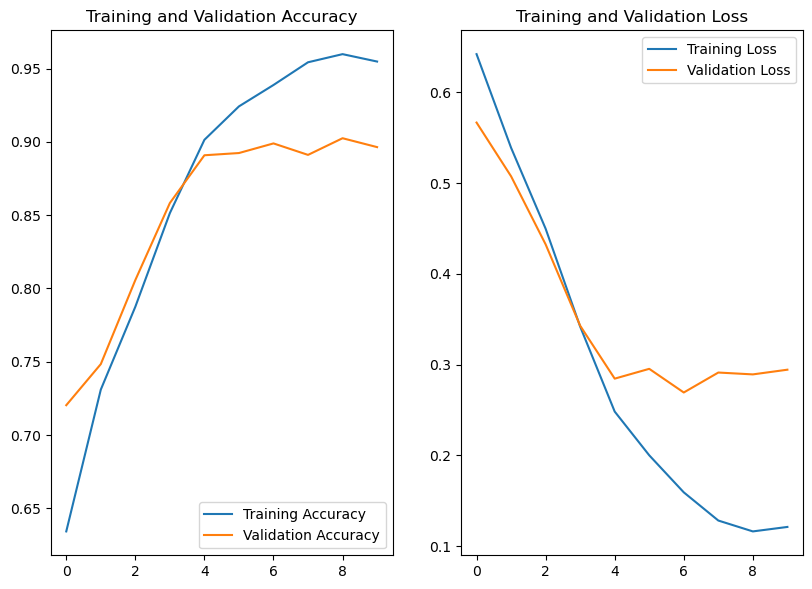

In [23]:
#graphs for accuracy and loss of training and validation data
plt.figure(figsize = (15,15))
plt.subplot(2,3,1)
plt.plot(range(EPOCHS), train_acc, label = 'Training Accuracy')
plt.plot(range(EPOCHS), val_acc, label = 'Validation Accuracy')
plt.legend(loc = 'lower right')
plt.title('Training and Validation Accuracy') 

plt.subplot(2,3,2)
plt.plot(range(EPOCHS), train_loss, label = 'Training Loss')
plt.plot(range(EPOCHS), val_loss, label = 'Validation Loss')
plt.legend(loc = 'upper right')
plt.title('Training and Validation Loss')

# cnn with two layers

In [24]:
input_shape=(40,40,3)

In [25]:
cnn_2_model=models.Sequential([
     layers.Conv2D(128, (3,3), activation = 'relu', input_shape = input_shape),
    layers.MaxPooling2D((2,2)),
     layers.Conv2D(256, (3,3), activation = 'relu', input_shape = input_shape),
    layers.MaxPooling2D((2,2)),
    
    layers.Flatten(),
    layers.Dense(128, activation = 'relu'),
    layers.Dense(64, activation = 'relu'),
    
    layers.Dense(1, activation= 'sigmoid')
   
    
]
)

In [26]:
cnn_2_model.compile(
    optimizer= 'adam',
    loss = 'binary_crossentropy',
    metrics = ['accuracy']
)

In [27]:
history = cnn_2_model.fit(train,
         epochs= 20,
         validation_data= val)

Epoch 1/20
100/100 [==============================] - 130s 1s/step - loss: 0.6062 - accuracy: 0.6639 - val_loss: 0.5368 - val_accuracy: 0.7193
Epoch 2/20
100/100 [==============================] - 128s 1s/step - loss: 0.3836 - accuracy: 0.8326 - val_loss: 0.2601 - val_accuracy: 0.8951
Epoch 3/20
100/100 [==============================] - 131s 1s/step - loss: 0.2249 - accuracy: 0.9133 - val_loss: 0.2029 - val_accuracy: 0.9252
Epoch 4/20
100/100 [==============================] - 129s 1s/step - loss: 0.1875 - accuracy: 0.9294 - val_loss: 0.1770 - val_accuracy: 0.9404
Epoch 5/20
100/100 [==============================] - 129s 1s/step - loss: 0.1590 - accuracy: 0.9425 - val_loss: 0.1634 - val_accuracy: 0.9507
Epoch 6/20
100/100 [==============================] - 129s 1s/step - loss: 0.1380 - accuracy: 0.9526 - val_loss: 0.1646 - val_accuracy: 0.9454
Epoch 7/20
100/100 [==============================] - 154s 2s/step - loss: 0.1265 - accuracy: 0.9582 - val_loss: 0.1614 - val_accuracy: 0.9485

In [28]:
cnn_2_model.evaluate(test)

18/18 [==============================] - 13s 352ms/step - loss: 0.2325 - accuracy: 0.9539


[0.23253142833709717, 0.9538888931274414]

In [29]:
EPOCHS=20

In [33]:
train_loss = history.history['loss']
train_acc = history.history['accuracy']

val_loss = history.history['val_loss']
val_acc = history.history['val_accuracy']

Text(0.5, 1.0, 'Training and Validation Loss')

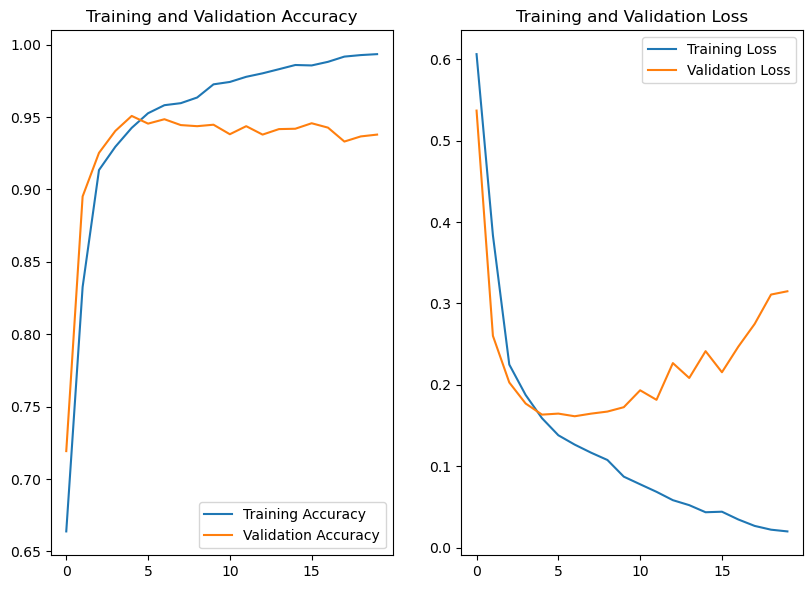

In [34]:
#graphs for accuracy and loss of training and validation data
plt.figure(figsize = (15,15))
plt.subplot(2,3,1)
plt.plot(range(EPOCHS), train_acc, label = 'Training Accuracy')
plt.plot(range(EPOCHS), val_acc, label = 'Validation Accuracy')
plt.legend(loc = 'lower right')
plt.title('Training and Validation Accuracy') 

plt.subplot(2,3,2)
plt.plot(range(EPOCHS), train_loss, label = 'Training Loss')
plt.plot(range(EPOCHS), val_loss, label = 'Validation Loss')
plt.legend(loc = 'upper right')
plt.title('Training and Validation Loss')

# cnn model with three layers

In [35]:
input_shape=(40,40,3)

In [36]:
model = models.Sequential([
    layers.Conv2D(128, (3,3), activation = 'relu', input_shape = input_shape),
    layers.MaxPooling2D((2,2)),
    layers.Dropout(0.2),
    layers.Conv2D(256, (3,3), activation = 'relu', padding ='SAME'),
    layers.MaxPool2D((2,2)),
    layers.Conv2D(256, (3,3), activation = 'relu',padding ='SAME'),
    layers.MaxPool2D((2,2)),
    layers.Flatten(),
    layers.Dense(128, activation = 'relu'),
    layers.Dense(64, activation = 'relu'),
    
    layers.Dense(1, activation= 'sigmoid')
    
])

In [37]:
model.summary()

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_3 (Conv2D)           (None, 38, 38, 128)       3584      
                                                                 
 max_pooling2d_3 (MaxPooling  (None, 19, 19, 128)      0         
 2D)                                                             
                                                                 
 dropout (Dropout)           (None, 19, 19, 128)       0         
                                                                 
 conv2d_4 (Conv2D)           (None, 19, 19, 256)       295168    
                                                                 
 max_pooling2d_4 (MaxPooling  (None, 9, 9, 256)        0         
 2D)                                                             
                                                                 
 conv2d_5 (Conv2D)           (None, 9, 9, 256)        

In [38]:
model.compile(
    optimizer= 'adam',
    loss = 'binary_crossentropy',
    metrics = ['accuracy']
)

In [39]:
history = model.fit(train,
         epochs=10,
         validation_data=val)


Epoch 1/10
100/100 [==============================] - 217s 2s/step - loss: 0.6602 - accuracy: 0.5958 - val_loss: 0.5856 - val_accuracy: 0.7251
Epoch 2/10
100/100 [==============================] - 213s 2s/step - loss: 0.3243 - accuracy: 0.8608 - val_loss: 0.1961 - val_accuracy: 0.9353
Epoch 3/10
100/100 [==============================] - 224s 2s/step - loss: 0.1605 - accuracy: 0.9488 - val_loss: 0.1642 - val_accuracy: 0.9490
Epoch 4/10
100/100 [==============================] - 225s 2s/step - loss: 0.1397 - accuracy: 0.9539 - val_loss: 0.1472 - val_accuracy: 0.9533
Epoch 5/10
100/100 [==============================] - 215s 2s/step - loss: 0.1310 - accuracy: 0.9572 - val_loss: 0.1441 - val_accuracy: 0.9543
Epoch 6/10
100/100 [==============================] - 461s 5s/step - loss: 0.1167 - accuracy: 0.9609 - val_loss: 0.1264 - val_accuracy: 0.9593
Epoch 7/10
100/100 [==============================] - 311s 3s/step - loss: 0.1109 - accuracy: 0.9626 - val_loss: 0.1229 - val_accuracy: 0.9613

In [40]:
model.evaluate(test)

18/18 [==============================] - 19s 539ms/step - loss: 0.1208 - accuracy: 0.9619


[0.12075404822826385, 0.9619444608688354]

In [41]:
EPOCHS=10

In [42]:
# Getting the model history to analyse
train_loss = history.history['loss']
train_acc = history.history['accuracy']

val_loss = history.history['val_loss']
val_acc = history.history['val_accuracy']

Text(0.5, 1.0, 'Training and Validation Loss')

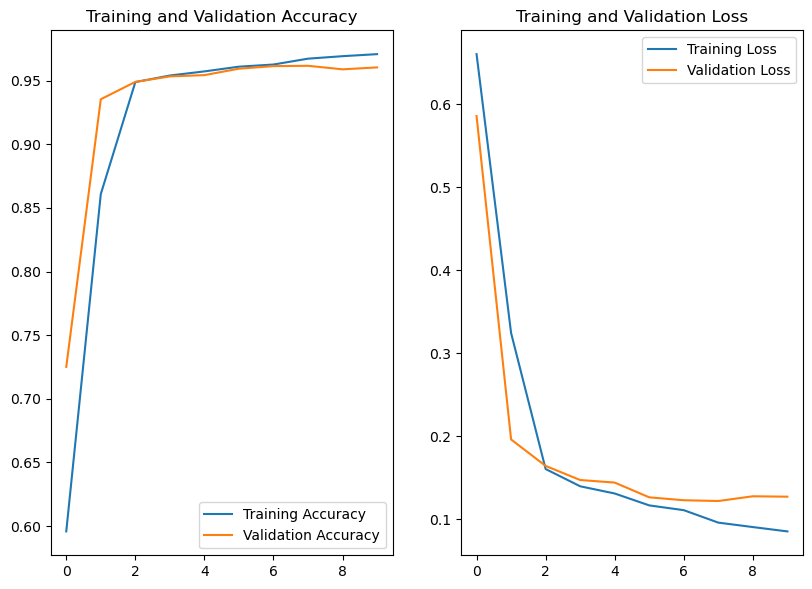

In [43]:
#graphs for accuracy and loss of training and validation data
plt.figure(figsize = (15,15))
plt.subplot(2,3,1)
plt.plot(range(EPOCHS), train_acc, label = 'Training Accuracy')
plt.plot(range(EPOCHS), val_acc, label = 'Validation Accuracy')
plt.legend(loc = 'lower right')
plt.title('Training and Validation Accuracy') 

plt.subplot(2,3,2)
plt.plot(range(EPOCHS), train_loss, label = 'Training Loss')
plt.plot(range(EPOCHS), val_loss, label = 'Validation Loss')
plt.legend(loc = 'upper right')
plt.title('Training and Validation Loss')

# vgg net

In [20]:
from tensorflow.keras.applications.vgg16  import  VGG16

In [21]:
model1=VGG16(
    weights="imagenet",
    include_top=False,
    input_shape=input_shape



)

In [22]:
model1.summary()

Model: "vgg16"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_1 (InputLayer)        [(None, 40, 40, 3)]       0         
                                                                 
 block1_conv1 (Conv2D)       (None, 40, 40, 64)        1792      
                                                                 
 block1_conv2 (Conv2D)       (None, 40, 40, 64)        36928     
                                                                 
 block1_pool (MaxPooling2D)  (None, 20, 20, 64)        0         
                                                                 
 block2_conv1 (Conv2D)       (None, 20, 20, 128)       73856     
                                                                 
 block2_conv2 (Conv2D)       (None, 20, 20, 128)       147584    
                                                                 
 block2_pool (MaxPooling2D)  (None, 10, 10, 128)       0     

In [23]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense,Flatten

In [24]:
vggnet=Sequential()

vggnet.add(model1)
vggnet.add(Flatten())
vggnet.add(Dense(10,activation="relu"))
vggnet.add(Dense(6,activation="sigmoid"))

In [25]:
vggnet.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 vgg16 (Functional)          (None, 1, 1, 512)         14714688  
                                                                 
 flatten (Flatten)           (None, 512)               0         
                                                                 
 dense (Dense)               (None, 10)                5130      
                                                                 
 dense_1 (Dense)             (None, 6)                 66        
                                                                 
Total params: 14,719,884
Trainable params: 14,719,884
Non-trainable params: 0
_________________________________________________________________


In [26]:
model1.trainable=False

In [27]:
vggnet.compile(optimizer='adam',
              loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
              metrics=['accuracy'])

In [28]:
history=vggnet.fit(train,validation_data=val,epochs=5)

Epoch 1/5
100/100 [==============================] - 267s 3s/step - loss: 0.7637 - accuracy: 0.6997 - val_loss: 0.4860 - val_accuracy: 0.8065
Epoch 2/5
100/100 [==============================] - 201s 2s/step - loss: 0.4311 - accuracy: 0.8189 - val_loss: 0.3972 - val_accuracy: 0.8277
Epoch 3/5
100/100 [==============================] - 196s 2s/step - loss: 0.3770 - accuracy: 0.8385 - val_loss: 0.3654 - val_accuracy: 0.8391
Epoch 4/5
100/100 [==============================] - 190s 2s/step - loss: 0.3543 - accuracy: 0.8474 - val_loss: 0.3509 - val_accuracy: 0.8436
Epoch 5/5
100/100 [==============================] - 181s 2s/step - loss: 0.3413 - accuracy: 0.8524 - val_loss: 0.3370 - val_accuracy: 0.8519


In [29]:
EPOCHS=5

In [30]:
# Getting the model history to analyse
train_loss = history.history['loss']
train_acc = history.history['accuracy']

val_loss = history.history['val_loss']
val_acc = history.history['val_accuracy']

Text(0.5, 1.0, 'Training and Validation Loss')

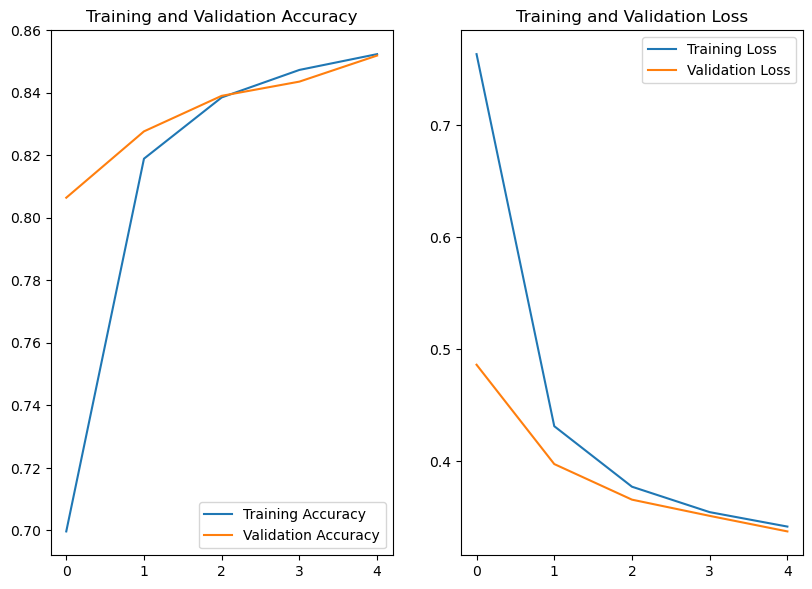

In [31]:
#graphs for accuracy and loss of training and validation data
plt.figure(figsize = (15,15))
plt.subplot(2,3,1)
plt.plot(range(EPOCHS), train_acc, label = 'Training Accuracy')
plt.plot(range(EPOCHS), val_acc, label = 'Validation Accuracy')
plt.legend(loc = 'lower right')
plt.title('Training and Validation Accuracy') 

plt.subplot(2,3,2)
plt.plot(range(EPOCHS), train_loss, label = 'Training Loss')
plt.plot(range(EPOCHS), val_loss, label = 'Validation Loss')
plt.legend(loc = 'upper right')
plt.title('Training and Validation Loss')

In [32]:
vggnet.evaluate(test)

18/18 [==============================] - 32s 1s/step - loss: 0.3382 - accuracy: 0.8514


[0.3382478356361389, 0.8513888716697693]

# Resnet model

In [49]:
from tensorflow.keras.applications.resnet50  import ResNet50

In [50]:
model2=ResNet50(
    weights="imagenet",
    include_top=False,
    input_shape=input_shape



)

In [51]:
resnet=Sequential()

resnet.add(model2)
resnet.add(Flatten())
resnet.add(Dense(10,activation="relu"))
resnet.add(Dense(6,activation="sigmoid"))

In [52]:
resnet.summary()

Model: "sequential_3"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 resnet50 (Functional)       (None, 2, 2, 2048)        23587712  
                                                                 
 flatten_3 (Flatten)         (None, 8192)              0         
                                                                 
 dense_6 (Dense)             (None, 10)                81930     
                                                                 
 dense_7 (Dense)             (None, 6)                 66        
                                                                 
Total params: 23,669,708
Trainable params: 23,616,588
Non-trainable params: 53,120
_________________________________________________________________


In [53]:
model2.trainable=False

In [54]:
resnet.compile(optimizer='adam',
              loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
              metrics=['accuracy'])

In [55]:
history=resnet.fit(train,validation_data=val,epochs=5)

Epoch 1/5
100/100 [==============================] - 143s 1s/step - loss: 0.7011 - accuracy: 0.6172 - val_loss: 0.6319 - val_accuracy: 0.6630
Epoch 2/5
100/100 [==============================] - 111s 1s/step - loss: 0.6289 - accuracy: 0.6594 - val_loss: 0.6560 - val_accuracy: 0.6241
Epoch 3/5
100/100 [==============================] - 121s 1s/step - loss: 0.6199 - accuracy: 0.6600 - val_loss: 0.6168 - val_accuracy: 0.6764
Epoch 4/5
100/100 [==============================] - 119s 1s/step - loss: 0.6152 - accuracy: 0.6666 - val_loss: 0.6106 - val_accuracy: 0.6678
Epoch 5/5
100/100 [==============================] - 117s 1s/step - loss: 0.6067 - accuracy: 0.6794 - val_loss: 0.6182 - val_accuracy: 0.6440


In [56]:
train_loss = history.history['loss']
train_acc = history.history['accuracy']

val_loss = history.history['val_loss']
val_acc = history.history['val_accuracy']

Text(0.5, 1.0, 'Training and Validation Loss')

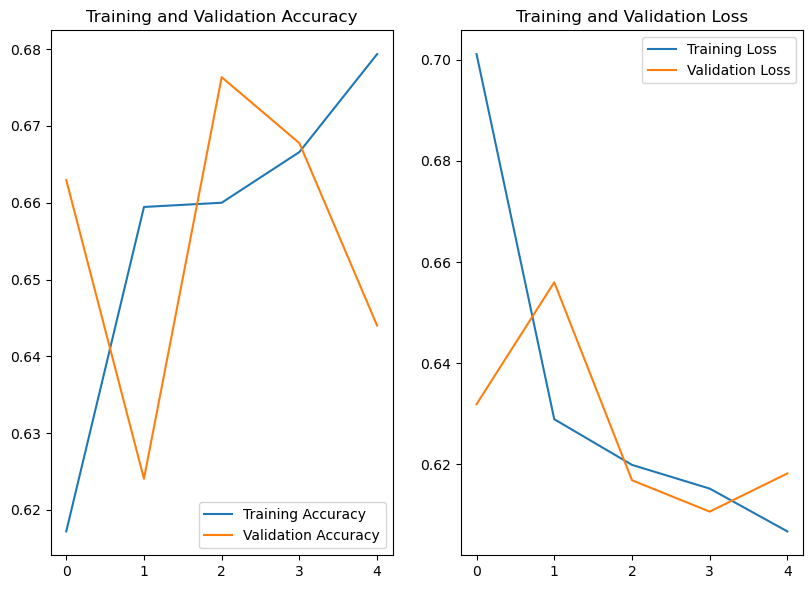

In [57]:

plt.figure(figsize = (15,15))
plt.subplot(2,3,1)
plt.plot(range(EPOCHS), train_acc, label = 'Training Accuracy')
plt.plot(range(EPOCHS), val_acc, label = 'Validation Accuracy')
plt.legend(loc = 'lower right')
plt.title('Training and Validation Accuracy') 

plt.subplot(2,3,2)
plt.plot(range(EPOCHS), train_loss, label = 'Training Loss')
plt.plot(range(EPOCHS), val_loss, label = 'Validation Loss')
plt.legend(loc = 'upper right')
plt.title('Training and Validation Loss')

In [60]:
resnet.evaluate(test)

18/18 [==============================] - 21s 799ms/step - loss: 0.6113 - accuracy: 0.6558


[0.6112716197967529, 0.6558333039283752]

In [58]:
import cv2

In [59]:
def predict_malaria(img):
    image=cv2.imread(img)
    resize=tf.image.resize(image,(40,40))
    scale=np.expand_dims(resize/255,0)
    pred=model.predict(scale)
    return pred
    
    
    
    